# Maze game report 
Using **A* Algorithm** to find the shortest path from the start node to the end node.

**Cost Function:** f(n) = g(n) + h(n), where:
 * g(n) is the **actual cost** to reach node n.
 * h(n) is the **heuristic cost** from n to the goal.

### [Diagonal distance](https://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html#diagonal-distance)
    **function heuristic(node)** =
        dx = abs(node.x - goal.x)
        dy = abs(node.y - goal.y)
        return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)
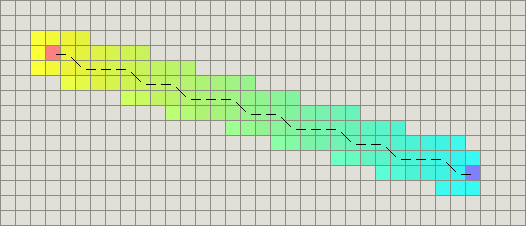

In [38]:
# Diagonal Distance Heuristic (A* heuristic function)
def heuristic(node, goal, D=1, D2=1.414):
    dx = abs(node[0] - goal[0])
    dy = abs(node[1] - goal[1])
    return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)

1. Representation of grids:
   * create an empty matrix 8x8 of str type
2. Generate random obstacles while keeping the start and end nodes constant.
   * random obstacles(#) with a ratio(30%)

In [39]:
import numpy as np
import random


Maze_Size = (8,8)
Robot = (5,4)
Treasure = (2,7)


def represent_grids(size,start,end,obstacle):
    grids = np.full(size,'', dtype=str)
    grids[start[0]][start[1]] = 'R'
    grids[end[0]][end[1]] = 'T'
    for i in range(size[0]):
        for j in range(size[1]):
            if (i, j) != start and (i, j) != end and random.random() < obstacle:
                grids[i][j] = '#'
    return grids
    
game = represent_grids(Maze_Size,Robot,Treasure,0.3)
print (game)

[['' '' '#' '' '' '' '' '']
 ['' '' '#' '' '#' '' '' '']
 ['' '' '' '' '#' '' '#' 'T']
 ['' '#' '#' '#' '' '#' '#' '']
 ['#' '#' '' '' '' '#' '' '#']
 ['' '' '' '#' 'R' '#' '#' '']
 ['' '' '' '' '#' '' '' '']
 ['#' '' '' '' '#' '#' '#' '#']]


### A* Search
1. Initialize the `open list` with the start node.
2. Initialize a dictionary `g_score` to store the cost.
3. Initialize a dictionary `close_list` to track of the path.
4. While the open list is not empty:
   * Pop the node with the lowest `f(n)` from the open list.
   * If `current` is the goal node, return the path
5. For neighbor:
   * check if is valid
   * calculate tentative_g_score
   * If neighbor's path is better
     * Update `g(n)` and calc `f(n)` then add it to `open_list` 
6. return no path if the open_list is empty and the tresure wasn't reached.

In [40]:
import heapq

def a_star_search(grid, start, goal):
    # Priority queue for open nodes, starting with the start node
    open_list = []
    heapq.heappush(open_list, (0, start))
    # Dictionary to store the cost to reach each node
    g_score = {start: 0}
    # Dictionary to track the best path
    close_list = {} 
    # Directions (diagonal movements)
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    
    while open_list:
        # Get the node with the lowest cost (f = g + h)
        current_f, current = heapq.heappop(open_list)

        if current == goal:
            # Goal reached
            path = []
            while current in close_list:
                path.append(current)
                current = close_list[current]
            path.reverse()
            return path
        
        for direction in directions:
            neighbor = (current[0] + direction[0], current[1] + direction[1])
            if 0 <= neighbor[0] < grid.shape[0] and 0 <= neighbor[1] < grid.shape[1]: # invalid location 
                if grid[neighbor[0]][neighbor[1]] == '#':  # Skip if obstacle
                    continue
                
                tentative_g_score = g_score[current] + heuristic(current, neighbor)
                
                # If neighbor's path is better, update the path and scores
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    g_score[neighbor] = tentative_g_score
                    f_score = tentative_g_score + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score, neighbor))
                    close_list[neighbor] = current
    
    # If no path is found
    return None

### Grid with the path
1. Convert the path list into a set
2. print (p) for path, (#) for obstacle and (-) if free.

In [41]:
def Path(grid, path):
    path_set = set(path)
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if (i, j) in path_set:
                print('P', end=' ')
            else:
                print(grid[i][j] if grid[i][j] else '-', end=' ')
        print()
path = a_star_search(game, Robot, Treasure)
Path(game, path)

- - # - - - - - 
- - # - # - P - 
- - - - # P # P 
- # # # P # # - 
# # - - P # - # 
- - - # R # # - 
- - - - # - - - 
# - - - # # # # 


### [Manhattan Distance](https://theory.stanford.edu/~amitp/GameProgramming/Heuristics.html#manhattan-distance)
    **function heuristic(node)** =
        dx = abs(node.x - goal.x)
        dy = abs(node.y - goal.y)
        return D * (dx + dy)
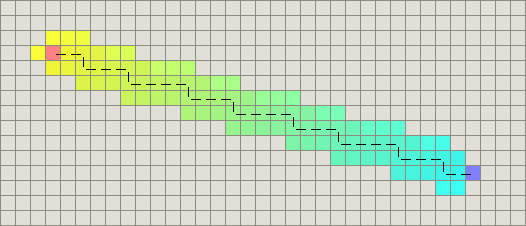

1. change the equation of heuristic to **Manhattan**.
2. change the direction to (UP, DOWN, RIGHT and LEFT)only :
   * directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

In [3]:
# Manhattan distance
def heuristic(self, node, goal):
        dx = abs(node[0] - goal[0])
        dy = abs(node[1] - goal[1])
        return  (dx + dy)


## Manhattan Direction simulation
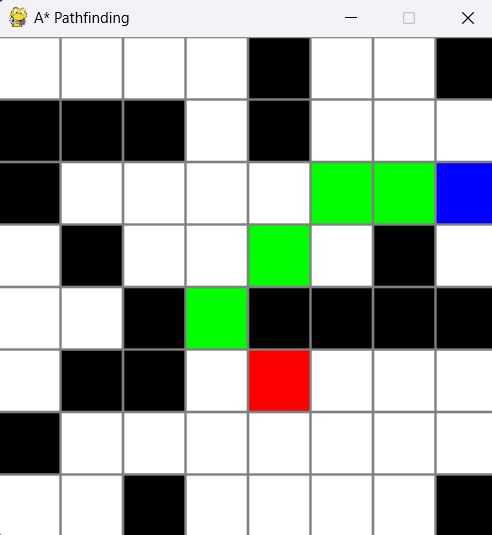

## Diagonal Direction simulation
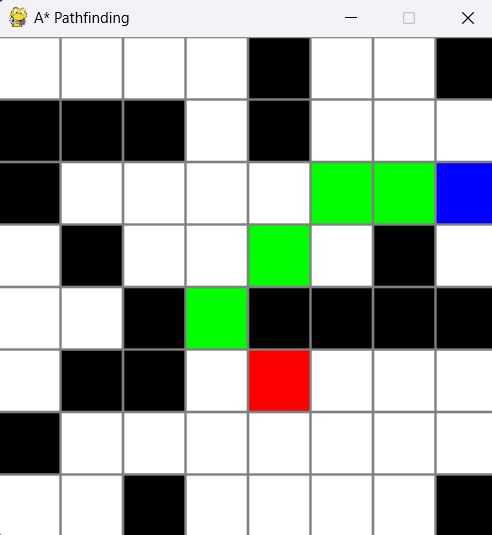